# Modelo de Regressão da Taxa de Criminalidade nos EUA

Este Notebook visa desenvolver um modelo simples de regressão linear da taxa de criminalidade nos EUA a partir do dataset disponível em http://www.statsci.org/data/general/uscrime.html.

Conforme descrito no link acima, seguem os parâmetros do dataset:

| Variável | Descrição                                                                               |       
|:--------:|:----------------------------------------------------------------------------------------|
| M		   | percentage of males aged 14–24 in total state population                                |
| So	   | indicator variable for a southern state                                                 |
| Ed	   | mean years of schooling of the population aged 25 years or over                         |
| Po1      | per capita expenditure on police protection in 1960                                     |
| Po2	   | per capita expenditure on police protection in 1959                                     |
| LF	   | labour force participation rate of civilian urban males in the age-group 14-24          |
| M.F      | number of males per 100 females                                                         |
| Pop	   | state population in 1960 in hundred thousands                                           |
| NW	   | percentage of nonwhites in the population                                               |
| U1	   | unemployment rate of urban males 14–24                                                  |
| U2	   | unemployment rate of urban males 35–39                                                  |
| Wealth   | wealth: median value of transferable assets or family income                            |
| Ineq	   | income inequality: percentage of families earning below half the median income          |
| Prob     | probability of imprisonment: ratio of number of commitments to number of offenses       | 
| Time	   | average time in months served by offenders in state prisons before their first release  |
| Crime	   | crime rate: number of offenses per 100,000 population in 1960                           |

O objetivo desta análise é estimar a taxa de criminalidade para um conjunto teste de dados de entrada. A estratégia de regressão linear foi escolhida pela natureza do problema (extrapolação de um valor dada uma função matemática). Além disso, a natureza dos dados facilita este tipo de estratégia, pois são variáveis contínuas à exceção de 'So' que é categórica mas já representada como uma *dummy_variable* e, portanto, adequada para utilização no modelo de regressão múltipla.

### Preparação do Dataset

Primeiramente, iremos extrair as informações do Dataset a ser utilizado na análise e criar uma estrutura de dados que poderá, em seguida, ser reutilizada durante a análise.

In [1]:
import pandas as pd

url ='http://www.statsci.org/data/general/uscrime.txt'
df = pd.read_csv(url, sep='\t')
df

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
0,15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
1,14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
2,14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
3,13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
4,14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234
5,12.1,0,11.0,11.8,11.5,0.547,96.4,25,4.4,0.084,2.9,6890,12.6,0.034201,20.9995,682
6,12.7,1,11.1,8.2,7.9,0.519,98.2,4,13.9,0.097,3.8,6200,16.8,0.042100,20.6993,963
7,13.1,1,10.9,11.5,10.9,0.542,96.9,50,17.9,0.079,3.5,4720,20.6,0.040099,24.5988,1555
8,15.7,1,9.0,6.5,6.2,0.553,95.5,39,28.6,0.081,2.8,4210,23.9,0.071697,29.4001,856
9,14.0,0,11.8,7.1,6.8,0.632,102.9,7,1.5,0.100,2.4,5260,17.4,0.044498,19.5994,705


### Seleção de Variáveis

A seleção das variáveis a serem utilizadas no modelo será feita a partir do estudo da correlação das variáveis de entrada com a saída (taxa de criminalidade). Além disso, a regressão linear possui a hipótese de que as suas variáveis de entrada são independentes (não-correlacionadas entre si). Quando duas variáveis são altamente correlacionadas, apenas uma delas deve ser usada no modelo e a outradeverá ser descartada, já que uma não traz nenhum tipo de informação extra em relação à outra. 

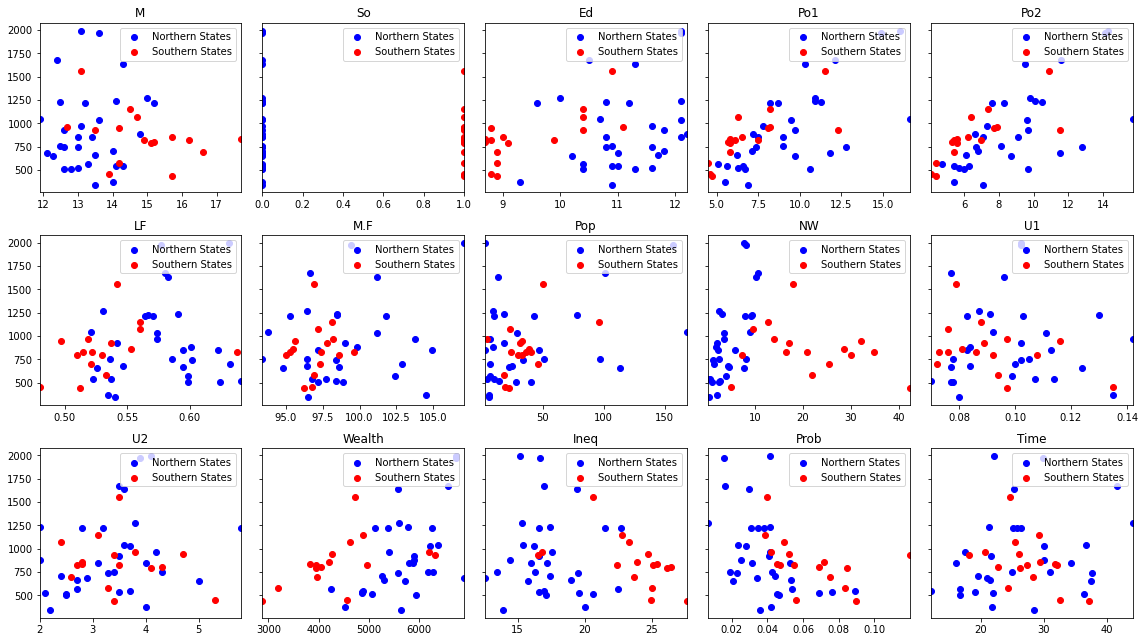

In [11]:
import matplotlib.pyplot as plt
import math

variables = list(df)

df_southern = df[df['So'] == 1]
df_northern = df[df['So'] == 0]

fig, axs = plt.subplots(3, 5, sharey=True, figsize=(16, 9))

lin = math.floor((len(variables) - 1) / 5)
col = math.floor((len(variables) - 1) / 3)

k = 0
for i in range(lin):
    for j in range(col):
        axs[i, j].scatter(df_northern[variables[k]], df_northern.loc[:, 'Crime'].to_numpy(),
                          color='blue', label='Northern States')
        axs[i, j].scatter(df_southern[variables[k]], df_southern.loc[:, 'Crime'].to_numpy(),
                          color='red', label='Southern States')
        axs[i, j].set_xlim(min(df[variables[k]]), max(df[variables[k]]))
        axs[i, j].set_title(variables[k])
        axs[i, j].legend(loc='upper right')
        k += 1

fig.tight_layout(pad=1.0)
plt.show()

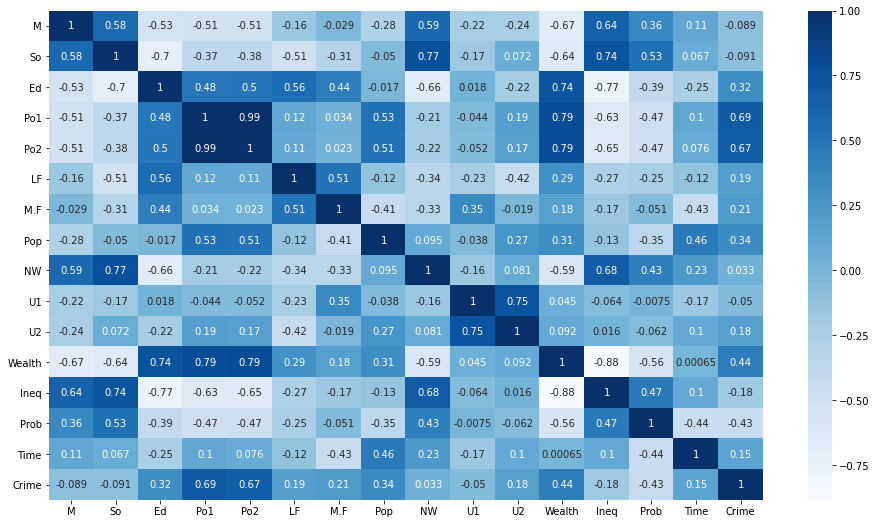

In [3]:
import seaborn as sns

#Using Pearson Correlation
plt.figure(figsize=(16, 9))
pearson = df.corr()
sns.heatmap(pearson, annot=True, cmap=plt.cm.Blues)
plt.show()

Naturalmente, como se constata na matriz de correlações acima, é de se esperar que a variável categórica *So* tenha uma baixa correlação com a saída pois, individualmente, não é capaz de capturar toda a variabilidade da taxa de criminalidade em apenas dois valores. No entanto, ela possui relevância estatística já que indica que os estados do sul tem, em média, menor taxa de criminalidade (856.81) que os estados do norte (930): 

In [4]:
# Estatísticas descritivas dos estados do sul
statistics_southern = df_southern[['So', 'Crime']].describe()
statistics_southern.rename(columns=lambda x: x + '_southern', inplace=True)

# Estatísticas descritivas dos estados do note
statistics_northern = df_northern[['So', 'Crime']].describe()
statistics_northern.rename(columns=lambda x: x + '_northern', inplace=True)

statistics = pd.concat([statistics_southern, statistics_northern], axis=1)
statistics

,So_southern,Crime_southern,So_northern,Crime_northern
count,16.0,16.000000,31.0,31.000000
mean,1.0,856.812500,0.0,930.000000
std,0.0,270.176046,0.0,437.015408
min,1.0,439.000000,0.0,342.000000
25%,1.0,767.250000,0.0,609.500000
50%,1.0,828.500000,0.0,849.000000
75%,1.0,950.250000,0.0,1216.000000
max,1.0,1555.000000,0.0,1993.000000


In [5]:
# Correlação com a variável de saída (a ser estimada pelo modelo)
output_correlation = abs(pearson['Crime'])

# Selecionando apenas correlações acima 0.15 (em valor absoluto)
relevant_inputs = output_correlation[output_correlation >= 0.15]
relevant_inputs

Ed        0.322835
Po1       0.687604
Po2       0.666714
LF        0.188866
M.F       0.213914
Pop       0.337474
U2        0.177321
Wealth    0.441320
Ineq      0.179024
Prob      0.427422
Crime     1.000000
Name: Crime, dtype: float64

Neste grupo, é preciso conferir se existem variáveis de entrada que estão muito correlacionadas. Analisando a matriz de correlações é possível identificar que *Po1* e *Po2* posuem uma correlação altíssima, de 0.99. O que se evidencia também pela natureza do dado: *per capita expenditure on police protection in 1960/1959*, o que significa que os estados não tiveram nenhum tipo de mudança considerável no total de despesas com proteção policial per capta de um ano para o outro. 

Nesta análise, *Po1* será utilizada (e *Po2* consequentemente descartada) por apresentar uma correlação com a taxa de criminalidade ligeiramente maior, mas os resultados finais não serão muito impactados por esta escolha.

Juntamente às variáveis escolhidas, conforme explicado anteriormente, também será considerada a variável *So* no modelo. Portanto a seguinte lista de variáveis foi considerada:

- So
- Ed
- Po1
- LF
- M.F
- Pop
- U2
- Wealth
- Ineq
- Prob

É interessante notar que fatores sociais que fazem sentido impactar na taxa de criminalidade apresentam a correlação estatística esperada. É o exemplo da média de anos de escolaridade de indivíduos com mais de 25 anos (*Ed*) e do número de homens a cada 100 mulheres (*MF*) que ambos estão correlacionados positivamete com a taxa de criminalidade. Também é o caso da probabilidade de encarceiramento (*Prob*) que, por sua vez, está negativamente correlacionado ao aumento da taxa de criminalidade. 

No entanto, entre outras, a correlação positiva da taxa de criminalidade com os gastos per capita com proteção policial (*Po1* e *Po2*) é um tanto quanto contraituitiva. Era de se esperar que quanto maiores os gastos com proteção policial, houvesse uma menor taxa de criminalidade. De toda maneira, esta variável será considerada de no modelo por inclusice ter sido a mais representativa dentre todas as outras.

Por fim, variáveis que indicam de certa forma viéses sociais (tal qual o racismo) - somente por constarem na pesquisa - como a porcentagem de não-brancos na população (*NW*) indicam, estatisticamente, uma correlação muito próxima de zero (a mais baixa dentre todas as variáveis) com a taxa de criminalidade.

### Modelo de Regressão Linear (Mínimos Quadrados)

Uma abordagem trivial para este problema é encontrar a melhor solução para o problema abaixo:

$$\mathbf{y} = \mathbf{X} \; \theta$$

visando a minimização da norma-2 do erro de estimativa $||\mathbf{y} - \mathbf{X} \; \theta||_2$. Neste problema, $\mathbf{y}$ é o vetor de saídas observadas, $\mathbf{X}$ é uma matriz contendo todos as entradas observadas e $\theta$ o vetor de parâmetros a ser determinado.

A solução para este problema é amplamente conhecida e pode ser obtida através da chamada pseudo-inversa de Moore-Penrose:

$$\theta = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$

In [6]:
import numpy as np

selected = ['So', 'Ed', 'Po1', 'LF', 'M.F', 'Pop', 'U2', 'Wealth', 'Ineq', 'Prob', 'Crime']
df_selected = df[selected]

X = np.insert(df_selected.loc[:, df_selected.columns != 'Crime'].to_numpy(), 0, np.ones(len(df_selected)), axis=1)
y = df_selected.loc[:, 'Crime']

theta = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose().dot(y))
print('Coefficients:')
print(theta)

Coefficients:
[-4.64547660e+03  1.78402196e+02  1.34215779e+02  1.12474691e+02
  4.73102891e+02  1.35073155e+01 -1.20089108e+00  4.58993504e+01
  4.46667698e-02  7.24988395e+01 -4.89418231e+03]


Ou, utilizando a biblioteca *scikit-learn* para simplificação da análise posterior:

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = df_selected.loc[:, df_selected.columns != 'Crime']
lin_reg_all = LinearRegression().fit(X, y)

# Provando que o resultado é o mesmo do calculado acima:
error = np.concatenate(([lin_reg_all.intercept_], lin_reg_all.coef_)) - theta
if np.linalg.norm(error) < 1e-6:
    print('Both methods give same results!')
else:
    print('Methods DO NOT give same results!')

r2 = lin_reg_all.score(X, y)
print('R2 = ', r2)

Both methods give same results!
R2 =  0.7470757834859243


### Dados de Treinamento e de Validação

Para garantir que não há nem *underfitting* nem *overfitting* do modelo calculado. O conjunto de dados será separado em dois determinados aleatoriamente: um para geração do modelo e outro para validação do mesmo. É desejado que a métrica de erro (RMSE) seja satisfatória no conjunto de treinamento e seu valor seja ligeiramente menor do que o do conjunto de validação, não utilizado para construção do modelo. 

Se o valor do erro for insatisfatório já no conjunto de treinamento, há indicativo de *underfitting*. Caso seu valor seja satisfatório no conjunto de treinamento mas sofra uma aumento considerável no conjunto de validação, há indício de *overfitting*.

Abaixo são apresentados os resultados para um conjunto de validação representando 30% do dataset que atinge os requisitos apresentados acima.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Computa a regressão linear considerando somente o conjunto de treinamento
lin_reg = LinearRegression().fit(X_train, y_train)

# Mostra que a raiz quadrada do erro médio quadrático é ligeiramente menor para o conjunto de treinamento
print("Train      RMSE: ", np.sqrt(mean_squared_error(lin_reg.predict(X_train), y_train)))
print("Validation RMSE: ", np.sqrt(mean_squared_error(lin_reg.predict(X_test), y_test)))

# O valor de R2 deve ser aceitável no conjunto de testes
print("Validation   R2: ", lin_reg.score(X_test, y_test))

Train      RMSE:  204.79210012002105
Validation RMSE:  215.4230919090957
Validation   R2:  0.7712771069319713


### Análise dos Resultados

In [9]:
# Dado de teste (não visto pelo modelo)
df_test = pd.DataFrame(columns=variables, 
                       data=[[14, 0, 10, 12, 15.5, 0.64, 94, 150, 1.1, 0.12, 3.6, 3200, 20.1, 0.04, 39.0, np.nan]])

# Estimativa da taxa de criminalidade para o dado de teste pedido
print("Crime = ", lin_reg.predict(df_test[selected[:-1]]))


Crime =  [1084.8723808]
